In [15]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, r2_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import pickle

In [16]:
data = pd.read_csv('./data2.csv')
data.head()

,Unnamed: 0,Sender,msgContent,Time,Date,Type,Final Category
0,0,BP-PAYTMB,Rs.8.16 paid at AMAZON on 03-10-2021 using Deb...,2324,1032021,Banking/Payments,1
1,1,57273030,Use verification code 703654 for Microsoft aut...,1125,1062021,OTP,1
2,2,AD-NHPSMS,"Dear Akshat Kumar, Congratulations! You have s...",959,9292021,Alerts,1
3,3,VM-HDFCBK,Your FD has been Renewed! We'll email the advi...,1325,912021,Alerts,1
4,4,77702,Enjoying our website? Text NEARME to 77702 to ...,2235,1092021,Advertising,0


In [17]:
data = data.drop(columns=['Sender','Unnamed: 0','Time','Date','Final Category'],axis=0)

In [18]:
data.head()

,msgContent,Type
0,Rs.8.16 paid at AMAZON on 03-10-2021 using Deb...,Banking/Payments
1,Use verification code 703654 for Microsoft aut...,OTP
2,"Dear Akshat Kumar, Congratulations! You have s...",Alerts
3,Your FD has been Renewed! We'll email the advi...,Alerts
4,Enjoying our website? Text NEARME to 77702 to ...,Advertising


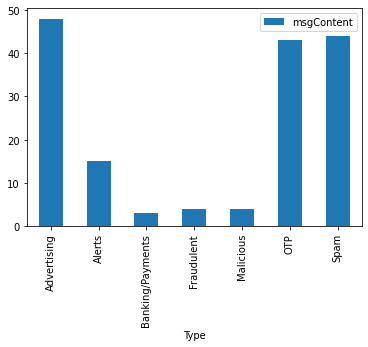

In [19]:
data.groupby('Type').count().plot.bar(ylim=0)
plt.show()

In [20]:
stemmer = PorterStemmer()
words = stopwords.words("english")

data['cleaned'] = data['msgContent'].apply(
    lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z0-9]", " ", x).split() 
    if i not in words]).lower()
    )

In [21]:
data.iloc[:][:10]

,msgContent,Type,cleaned
0,Rs.8.16 paid at AMAZON on 03-10-2021 using Deb...,Banking/Payments,rs 8 16 paid amazon 03 10 2021 use debit card ...
1,Use verification code 703654 for Microsoft aut...,OTP,use verif code 703654 microsoft authent
2,"Dear Akshat Kumar, Congratulations! You have s...",Alerts,dear akshat kumar congratul you success comple...
3,Your FD has been Renewed! We'll email the advi...,Alerts,your fd renew we email advic avail td waiver s...
4,Enjoying our website? Text NEARME to 77702 to ...,Advertising,enjoy websit text nearm 77702 set locat specif...
5,"Thanks for your interest in Raleigh, NC homes....",Advertising,thank interest raleigh nc home we get back two...
6,"Good News!! INR 50,000.00 in account xxxx9467 ...",Fraudulent,good new inr 50 000 00 account xxxx9467 within...
7,Lenskart Bestseller: The Candyland Collection....,Advertising,lenskart bestsel the candyland collect dynam b...
8,Your OTP to register/access CoWIN is 344465. I...,OTP,your otp regist access cowin 344465 it valid 3...
9,"Dear Customer, Flipkart Internet Pvt Ltd has r...",Banking/Payments,dear custom flipkart internet pvt ltd request ...


In [22]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(data['cleaned']).toarray()
final_features.shape

(161, 323)

In [23]:
X = data['cleaned']
Y = data['Type']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.15,random_state=42)

pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=230)),
                     ('clf', RandomForestClassifier(n_estimators=300))])
# fitting our model and save it in a pickle for later use
model = pipeline.fit(x_train, y_train)
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)

In [24]:
ytest = np.array(y_test)
print(classification_report(ytest, model.predict(x_test)))
print(confusion_matrix(ytest, model.predict(x_test)))

                  precision    recall  f1-score   support

     Advertising       0.54      1.00      0.70         7
          Alerts       0.50      0.33      0.40         3
Banking/Payments       0.00      0.00      0.00         1
      Fraudulent       0.00      0.00      0.00         0
       Malicious       0.00      0.00      0.00         1
             OTP       0.86      1.00      0.92         6
            Spam       1.00      0.29      0.44         7

        accuracy                           0.64        25
       macro avg       0.41      0.37      0.35        25
    weighted avg       0.70      0.64      0.59        25

[[7 0 0 0 0 0 0]
 [1 1 0 0 0 1 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 6 0]
 [5 0 0 0 0 0 2]]


/Users/namanmayer/AI-ML/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/namanmayer/AI-ML/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/namanmayer/AI-ML/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/namanmayer/AI-ML/ml/

In [25]:
print(model.predict(np.array(['You have still not claimed the compensation you are due for the accident you had. To start the process please reply YES. To opt out text STOP'])))

['Spam']


/Users/namanmayer/AI-ML/ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


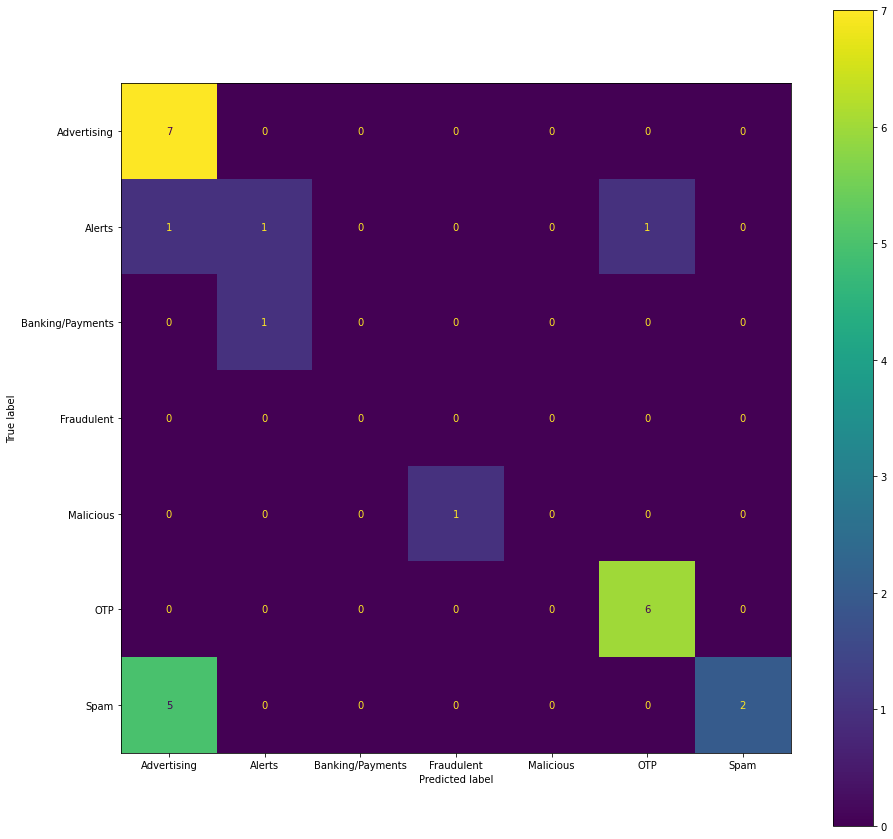

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix 
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(model,x_test,y_test, ax=ax)
plt.show()